In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

This is a draft for the Dash application I intend to build that visualizes different metrics relating to my laptop's battery health.

In [227]:
location = r"C:\Users\chuat\battery-report.html"
html_file = open(location,"r").read() #"r" for reading
html_file

'ï»¿<!DOCTYPE html>\n<!-- saved from url=(0016)http://localhost -->\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:ms="urn:schemas-microsoft-com:xslt" xmlns:bat="http://schemas.microsoft.com/battery/2012" xmlns:js="http://microsoft.com/kernel"><head><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta name="ReportUtcOffset" content="-4:00"/><title>Battery report</title><style type="text/css">\n\n      body {\n\n          font-family: Segoe UI Light;\n\n          letter-spacing: 0.02em;\n\n          background-color: #181818;\n\n          color: #F0F0F0;\n\n          margin-left: 5.5em;\n\n      }\n\n\n\n      h1 {\n\n          color: #11D8E8;\n\n          font-size: 42pt;\n\n      }\n\n\n\n      h2 {\n\n          font-size: 15pt;\n\n          color: #11EEF4;\n\n          margin-top: 4em;\n\n          margin-bottom: 0em;\n\n          letter-spacing: 0.08em;\n\n      }\n\n\n\n      td {\n\n          padding-left: 0.3em;\n\n          padding-right: 0.3em;\n\n      }\n\n\n\n     

In [307]:
start = html_file.find("Battery capacity history")+len("Battery capacity history")
end = html_file.find("Battery life estimates\n\n")+len("Battery life estimates\n\n")

subset = html_file[start:end]
split = re.split("</tr>",subset)
filter_split1 = [i for i in split if re.match("^<tr class=|</thead>",i) is not None]
delete_tags = [re.sub("<.*>","",i) for i in filter_split1]
filter_split2 = [i for i in delete_tags if re.match("^[0-9]{4}-[0-9]{2}-[0-9]{2}",i) is not None]
delete_upperBoundDate = [re.sub("\s+-\s[0-9]{4}-[0-9]{2}-[0-9]{2}"," ",i) for i in filter_split2]
trim = [re.sub("\smWh|,|\n","",i) for i in delete_upperBoundDate]
add_delimiter = [re.sub("\s+",";",i) for i in trim]

table_values = [i[:-1] for i in add_delimiter]
table_values = [i.split(";") for i in table_values]

data = pd.DataFrame(table_values)
data.columns = ["week","fcc","dc"]

data["pch"] = data["fcc"].astype(int).pct_change()
data.loc[0,"pch"] = (int(data.loc[0,"fcc"]) - 50730) / 50730.0

data.head()

,week,fcc,dc,pch
0,2020-01-05,49797,50730,-0.018391
1,2020-01-13,49587,50730,-0.004217
2,2020-01-19,49330,50730,-0.005183
3,2020-01-26,49186,50730,-0.002919
4,2020-02-03,48853,50730,-0.006770


Text(0, 0.5, '% Change')

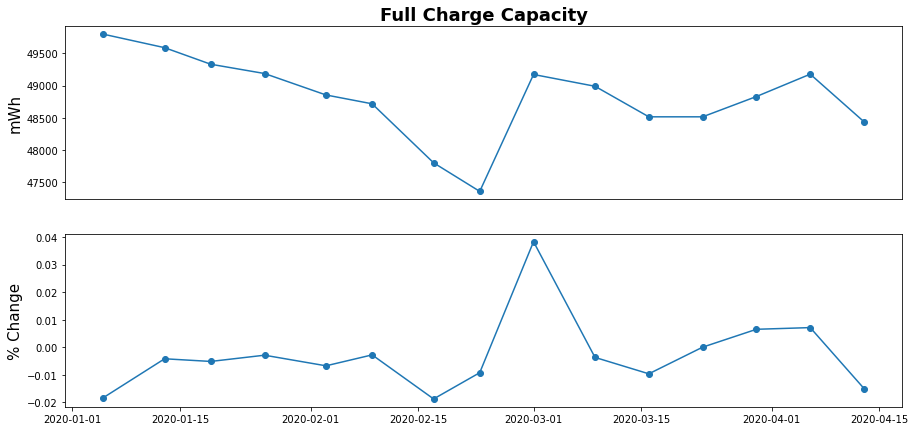

In [310]:
index = pd.DatetimeIndex(data["week"])

#FCC
series = pd.Series(data["fcc"].astype(int).values,index = index)

#PCH
series1 = pd.Series(data["pch"].astype(float).values,index = index)

#Figure 1
fig,(row1,row2) = plt.subplots(2,1,figsize = (15,7))
row1.scatter(index,series)
row1.plot(series)
row1.set_title("Full Charge Capacity",fontsize = 18,fontweight = "bold")
row1.set_ylabel("mWh",fontsize = 15)
row1.set_xticks([])

row2.scatter(index,series1)
row2.plot(series1)
row2.set_ylabel("% Change",fontsize = 15)